# Loading the dependencies

In [1]:
! pip install pandas-profiling

# Loading the data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# '/content/drive/MyDrive/Summer2023/datathon/team2/data/pulseox_dataset.csv'

In [4]:
import pandas as pd

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Path to your CSV file
# csv_path = '/content/drive/MyDrive/Summer2023/datathon/team2/data/pulseox_dataset.csv'
csv_path = '/Users/mac/Desktop/Summer_2023/datathon/pulseox_dataset.csv'


# Read the CSV file using Pandas
df_initial = pd.read_csv(csv_path)

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_9593/440743242.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_initial = pd.read_csv(csv_path)


# Data Preprocessing

In [5]:
# Display the first few rows of the DataFrame
print(df_initial.head())

   unique_subject_id  unique_hospital_admission_id  unique_icustay_id  \
0                  0                             0                  0   
1                  1                             1                  1   
2                  2                             2                  2   
3                  3                             3                  3   
4                  4                             4                  4   

  subject_id  hospital_admission_id  icustay_id source_db  hospitalid  \
0  002-10050                 183274      211144      eicu          71   
1   002-1007                 178462      204935      eicu          71   
2  002-10187                 150828      169525      eicu          73   
3  002-10306                 198249      230427      eicu          63   
4  002-10324                 188445      217835      eicu          73   

  numbedscategory  teachingstatus  ... delta_sofa_future_coagulation_24hr  \
0       100 - 249           False  ...       

In [52]:
df_initial.shape

(49093, 142)

In [6]:
# Assume 'df_initial' is your DataFrame
column_names = df_initial.columns.tolist()

print("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

In [7]:
column_names

['unique_subject_id',
 'unique_hospital_admission_id',
 'unique_icustay_id',
 'subject_id',
 'hospital_admission_id',
 'icustay_id',
 'source_db',
 'hospitalid',
 'numbedscategory',
 'teachingstatus',
 'region',
 'admission_age',
 'sex_female',
 'weight_admission',
 'height_admission',
 'BMI_admission',
 'datetime_hospital_admit',
 'datetime_hospital_discharge',
 'datetime_icu_admit',
 'datetime_icu_discharge',
 'los_hospital',
 'los_ICU',
 'comorbidity_score_name',
 'comorbidity_score_value',
 'in_hospital_mortality',
 'race_ethnicity',
 'SaO2_timestamp',
 'pH',
 'pCO2',
 'pO2',
 'SaO2',
 'SpO2',
 'Carboxyhemoglobin',
 'Methemoglobin',
 'SpO2_timestamp',
 'delta_SpO2',
 'delta_vitals_heart_rate',
 'vitals_heart_rate',
 'delta_vitals_resp_rate',
 'vitals_resp_rate',
 'delta_vitals_mbp_ni',
 'vitals_mbp_ni',
 'delta_vitals_sbp_ni',
 'vitals_sbp_ni',
 'delta_vitals_dbp_ni',
 'vitals_dbp_ni',
 'delta_vitals_mbp_i',
 'vitals_mbp_i',
 'delta_vitals_sbp_i',
 'vitals_sbp_i',
 'delta_vitals_db

In [8]:
# removing all the non necessary columns

# Columns starting with 'datetime' to drop
datetime_columns = [col for col in df_initial.columns if col.startswith('datetime')]

# Columns starting with 'delta' to drop
delta_columns = [col for col in df_initial.columns if col.startswith('delta')]

# Drop the datetime columns
df_datetime_dropped = df_initial.drop(columns=datetime_columns)

# Drop the extra columns
df_col_dropped = df_datetime_dropped.drop(columns=delta_columns)

In [9]:
# Assume 'df_col_dropped' is your DataFrame
column_names_new = df_col_dropped.columns.tolist()

print("Column names:", column_names_new)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'vitals_heart_rate', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_mbp_i', 'vitals_sbp_i', 'vitals_dbp_i', 'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet', 'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_fibrinogen', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_ca

In [10]:
# Columns starting with 'sofa' to drop
# we want to keep sofa_past_overall_24hr
sofa_columns = [col for col in df_col_dropped.columns if col.startswith('sofa') and col != 'sofa_past_overall_24hr']
    

# Drop the sofa columns
df_dropped_without_sofa = df_col_dropped.drop(columns=sofa_columns)

extra_col_to_drop = ['subject_id', 'hospital_admission_id', 'icustay_id']

# Drop the specified columns
df_dropped_final = df_dropped_without_sofa.drop(columns=extra_col_to_drop)


In [11]:
# Assume 'df_dropped_final' is your DataFrame
column_names_final = df_dropped_final.columns.tolist()

print("Column names:", column_names_final)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'vitals_heart_rate', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_mbp_i', 'vitals_sbp_i', 'vitals_dbp_i', 'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet', 'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_fibrinogen', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast

## Handling Missing values

In [12]:
# Drop rows with any missing values
df_cleaned_test = df_dropped_final.dropna()

# Display the shape of the cleaned DataFrame to see how many rows remain
print("Original shape:", df_dropped_final.shape)
print("Cleaned shape:", df_cleaned_test.shape)

Original shape: (49093, 70)
Cleaned shape: (1, 70)


Each row has at least one missing value, thus, cleaning the dataset from all missing values leaves us with no rows. Therefore, we look for a new approach. 

In [13]:
# Calculate the percentage of missing values in each column
missing_percentage = (df_dropped_final.isnull().sum() / len(df_dropped_final)) * 100

# Create a DataFrame to hold missing info
missing_info = pd.DataFrame({
    'ColumnName': missing_percentage.index,
    'MissingPercentage': missing_percentage.values
})

# Filter columns with missing percentage larger than 50 (TO VARY WITH DOCTORS) - DISCUSS 
columns_with_missing = missing_info[missing_info['MissingPercentage'] > 50]

# Display the filtered DataFrame as a table
display(columns_with_missing)

ColumnName  MissingPercentage
25     Carboxyhemoglobin          77.675025
26         Methemoglobin          78.457214
33          vitals_mbp_i          63.306378
34          vitals_sbp_i          64.685393
35          vitals_dbp_i          64.701689
46       coag_fibrinogen          83.698287
59           bmp_lactate          52.905710
64  hfp_bilirubin_direct          88.458640
66         others_ck_cpk          74.912920
67          others_ck_mb          81.848736
68         others_ld_ldh          91.012975

### Removing unnecessary Columns

In [66]:
# columns_with_missing is a dataframe
# List of column names with missing values
columns_to_drop = columns_with_missing['ColumnName'].tolist()

In [15]:
# Drop the columns from your DataFrame  -> droping all the columns with > 50% missing values
df_cleaned_from_col = df_dropped_final.drop(columns=columns_to_drop, axis=1)

# Display the shape of the cleaned DataFrame to see the changes 
print("Original shape:", df_dropped_final.shape)
print("Cleaned shape:", df_cleaned_from_col.shape)

Original shape: (49093, 70)
Cleaned shape: (49093, 59)


### Removing unnecessary Rows

In [16]:
# Assuming your DataFrame is named 'df_cleaned'
row_missing_percentages = df_cleaned_from_col.isnull().mean(axis=1) * 100

# Print the rows with their missing percentages
for index, missing_percentage in enumerate(row_missing_percentages):
    print(f"Row {index + 1}: Missing Percentage = {missing_percentage:.2f}%")

Row 1: Missing Percentage = 23.73%
Row 2: Missing Percentage = 5.08%
Row 3: Missing Percentage = 15.25%
Row 4: Missing Percentage = 10.17%
Row 5: Missing Percentage = 38.98%
Row 6: Missing Percentage = 23.73%
Row 7: Missing Percentage = 25.42%
Row 8: Missing Percentage = 27.12%
Row 9: Missing Percentage = 23.73%
Row 10: Missing Percentage = 0.00%
Row 11: Missing Percentage = 35.59%
Row 12: Missing Percentage = 5.08%
Row 13: Missing Percentage = 1.69%
Row 14: Missing Percentage = 0.00%
Row 15: Missing Percentage = 1.69%
Row 16: Missing Percentage = 8.47%
Row 17: Missing Percentage = 28.81%
Row 18: Missing Percentage = 52.54%
Row 19: Missing Percentage = 15.25%
Row 20: Missing Percentage = 28.81%
Row 21: Missing Percentage = 38.98%
Row 22: Missing Percentage = 3.39%
Row 23: Missing Percentage = 16.95%
Row 24: Missing Percentage = 18.64%
Row 25: Missing Percentage = 47.46%
Row 26: Missing Percentage = 3.39%
Row 27: Missing Percentage = 11.86%
Row 28: Missing Percentage = 13.56%
Row 29: Mi

We need to ensure that you're not dropping rows with important information. The approach of inspecting the columns with missing values for each row before dropping them is a good way to mitigate this risk. By seeing which specific columns have missing values in those rows, you can make a more informed decision about whether to drop them or not.



In [17]:
# Assuming your DataFrame is named 'df_cleaned'
threshold = 20  # Set the threshold for dropping rows with more than 60% missing values

# Calculate the percentage of missing values for each row
row_missing_percentages = (df_cleaned_from_col.isnull().sum(axis=1) / len(df_cleaned_from_col.columns)) * 100

# Filter rows with missing percentage larger than the threshold
rows_to_drop = row_missing_percentages[row_missing_percentages > threshold]

# Print rows with more than 60% missing values along with columns containing missing values
for index, missing_percentage in rows_to_drop.items():
    missing_columns = df_cleaned_from_col.columns[df_cleaned_from_col.loc[index].isnull()]
    print(f"Row {index}: Missing Percentage = {missing_percentage:.2f}%")
    print(f"   Columns with Missing Values: {', '.join(missing_columns)}")
    
# Drop the rows from the original DataFrame
df_cleaned_fromMissing = df_cleaned_from_col.drop(index=rows_to_drop.index)

Row 0: Missing Percentage = 23.73%
   Columns with Missing Values: vitals_mbp_ni, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 4: Missing Percentage = 38.98%
   Columns with Missing Values: weight_admission, BMI_admission, vitals_mbp_ni, cbc_hemoglobin, cbc_hematocrit, cbc_mch, cbc_mchc, cbc_mcv, cbc_platelet, cbc_rbc, cbc_rdw, cbc_wbc, coag_ptt, bmp_sodium, bmp_potassium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_glucose, bmp_aniongap, bmp_calcium, sofa_past_overall_24hr
Row 5: Missing Percentage = 23.73%
   Columns with Missing Values: vitals_mbp_ni, bmp_sodium, bmp_chloride, bmp_bicarbonate, bmp_bun, bmp_creatinine, bmp_aniongap, bmp_calcium, hfp_alt, hfp_alp, hfp_ast, hfp_bilirubin_total, hfp_albumin, sofa_past_overall_24hr
Row 6: Missing Percentage = 25.42%
   Columns with Missing Values: vitals_mbp_ni, bmp_sodium, bmp_potassiu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
# Display the cleaned DataFrame shape
print(df_cleaned_fromMissing.shape)

(38955, 59)


In [19]:
data_post_nan_cleaning = df_cleaned_fromMissing

It is crutial to REconsider this threshold and understand whether the columns where the NaNs are relevant to the question to solve. 

### Variable Encoding
Variable encoding, also known as feature encoding or categorical encoding, is a fundamental preprocessing step in machine learning and data analysis. Its goal is to convert categorical variables (features) into a numerical format that machine learning algorithms can work with effectively. Categorical variables are those that represent categories or labels rather than numerical quantities. Encoding categorical variables is essential because many machine learning algorithms require numerical input data.

In [20]:
# Filter columns with non-numeric data types
non_numeric_columns = data_post_nan_cleaning.select_dtypes(exclude=['int', 'float']).columns

print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
Index(['source_db', 'numbedscategory', 'teachingstatus', 'region',
       'comorbidity_score_name', 'race_ethnicity', 'SaO2_timestamp',
       'SpO2_timestamp'],
      dtype='object')


In [21]:
# Create a new DataFrame containing only the desired columns
non_numeric_columns_df = data_post_nan_cleaning[non_numeric_columns]

In [22]:
non_numeric_columns_df.head()

source_db numbedscategory  teachingstatus   region comorbidity_score_name  \
1       eicu       100 - 249           False  Midwest               Charlson   
2       eicu          >= 500            True  Midwest               Charlson   
3       eicu       100 - 249           False  Midwest               Charlson   
9       eicu       100 - 249           False  Midwest               Charlson   
11      eicu          >= 500            True  Midwest               Charlson   

   race_ethnicity       SaO2_timestamp       SpO2_timestamp  
1           White  2014-01-01 05:14:00  2014-01-01 05:14:00  
2           White  2014-01-01 00:13:00  2014-01-01 00:13:00  
3           Asian  2014-01-03 20:53:00  2014-01-03 20:50:00  
9           White  2014-01-01 04:51:00  2014-01-01 04:47:00  
11          White  2014-01-01 01:19:00  2014-01-01 01:18:00

N.B: This function converts a DataFrame into Markdown format, which is suitable for rendering as a table in various environments like Jupyter Notebook or Markdown documents.

In [23]:
# List of columns to check
columns_to_check = ['source_db', 'numbedscategory', 'teachingstatus', 'region',
                    'comorbidity_score_name', 'race_ethnicity', 'SaO2_timestamp', 'SpO2_timestamp']

# Get unique values for each column
for column in columns_to_check:
    unique_values = data_post_nan_cleaning[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print() 

Unique values in source_db:
['eicu' 'mimic_iii' 'mimic_iv']

Unique values in numbedscategory:
['100 - 249' '>= 500' '<100' '250 - 499' nan]

Unique values in teachingstatus:
[False  True]

Unique values in region:
['Midwest' nan 'South' 'West' 'Northeast']

Unique values in comorbidity_score_name:
['Charlson' 'Elixhauser']

Unique values in race_ethnicity:
['White' 'Asian' 'Unknown' 'American Indian / Alaska Native'
 'Hispanic OR Latino' 'Black' 'Native Hawaiian / Pacific Islander'
 'More Than One Race']

Unique values in SaO2_timestamp:
['2014-01-01 05:14:00' '2014-01-01 00:13:00' '2014-01-03 20:53:00' ...
 '2123-12-30 10:03:00+00:00' '2126-05-06 08:03:00+00:00'
 '2128-03-02 16:01:00+00:00']

Unique values in SpO2_timestamp:
['2014-01-01 05:14:00' '2014-01-01 00:13:00' '2014-01-03 20:50:00' ...
 '2123-12-30 10:00:00+00:00' '2126-05-06 08:00:00+00:00'
 '2128-03-02 16:00:00+00:00']



* source_db:
Since 'source_db' has nominal values with multiple categories, you could use One-Hot Encoding to convert each category into a separate binary column.

* numbedscategory:
This variable seems ordinal, as the values have a natural ordering. In this case, you could use Label Encoding, where you assign a numerical label to each category based on its order.

* teachingstatus:
'teachingstatus' has binary values (True/False), so it's a good candidate for Label Encoding. You could assign 1 to True and 0 to False.

* region:
'region' is nominal with multiple categories. You could use One-Hot Encoding to represent each category as a separate binary column.

* comorbidity_score_name:
Since 'comorbidity_score_name' is nominal with only two categories, you could use Label Encoding.

* race_ethnicity:
'race_ethnicity' is nominal with multiple categories. You could use One-Hot Encoding to represent each category as a separate binary column.



In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Apply Label Encoding to numbedscategory and comorbidity_score_name
label_encoder = LabelEncoder()

# Apply Label Encoding to teachingstatus (binary variable)
data_post_nan_cleaning['teachingstatus_encoded'] = label_encoder.fit_transform(data_post_nan_cleaning['teachingstatus'])

NOTE FOR CLARITY: 
The line df['teachingstatus_encoded'] = label_encoder.fit_transform(df['teachingstatus']) is meant to encode the binary categorical variable teachingstatus using label encoding.

In [25]:
# Display the new DataFrame with encoded features
data_post_nan_cleaning.head()

unique_subject_id  unique_hospital_admission_id  unique_icustay_id  \
1                   1                             1                  1   
2                   2                             2                  2   
3                   3                             3                  3   
9                   9                             9                  9   
11                 11                            11                 11   

   source_db  hospitalid numbedscategory  teachingstatus   region  \
1       eicu          71       100 - 249           False  Midwest   
2       eicu          73          >= 500            True  Midwest   
3       eicu          63       100 - 249           False  Midwest   
9       eicu          71       100 - 249           False  Midwest   
11      eicu          73          >= 500            True  Midwest   

    admission_age  sex_female  ...  bmp_glucose  bmp_aniongap  bmp_calcium  \
1            83.0           1  ...        194.0          20.0          8.3   
2            59.0           1  ...        135.0          15.0          8.0   
3            73.0           0  ...        119.0          15.0          7.3   
9            60.0           0  ...        151.0          17.0          7.0   
11           31.0           0  ...        158.0           7.0          8.3   

    hfp_alt  hfp_alp hfp_ast  hfp_bilirubin_total  hfp_albumin  \
1      14.0     97.0    11.0                  0.3          2.6   
2       NaN      NaN     NaN                  NaN          NaN   
3       NaN      NaN     NaN                  1.1          2.5   
9      42.0     58.0    20.0                  0.7          3.9   
11     56.0     72.0    48.0                  0.5          3.0   

   sofa_past_overall_24hr teachingstatus_encoded  
1                     3.0                      0  
2                     NaN                      1  
3                     3.0                      0  
9                     6.0                      0  
11                    3.0                      1  

[5 rows x 60 columns]

In [26]:
# Apply One-Hot Encoding to source_db, region, and race_ethnicity
data_encoded = pd.get_dummies(data_post_nan_cleaning, columns=['source_db', 'region', 'race_ethnicity'], drop_first=True)

In [27]:
## FOR NOW -> I WILL DROP BOTH COLUMNS
## WE WILL ALSO DROP THE COLUMN -> numbedscategory and comorbidity_score_name, CHECK ITS RELEVANCE ??? - DISCUSS

more_col_to_drop = ['SaO2_timestamp', 'SpO2_timestamp','comorbidity_score_name','numbedscategory']

# Drop the specified columns
data_clean = data_encoded.drop(columns=more_col_to_drop)
df = data_clean

In [51]:
df.shape

(23036, 67)

Since a lot of clustering algorithms need the dataset to have no missing values, and in order to retain most of the information it is a great idea to impute the values instead of dropping all the rows with missing values. 

### Computing p50 and adding it to the Dataframe

In [28]:
import pandas as pd

# Assuming your DataFrame is called "df" and has columns "pO2" and "SpO2"
df['p50'] = ((100 * (df['pO2']**3) / df['SpO2']) - (df['pO2']**3))**(1/3)

In [29]:
df['p50']

1        43.471717
2        31.547938
3         0.000000
9        27.041090
11        0.000000
           ...    
49088    32.603787
49089    22.187561
49090    26.234485
49091    23.778308
49092     0.000000
Name: p50, Length: 38955, dtype: float64

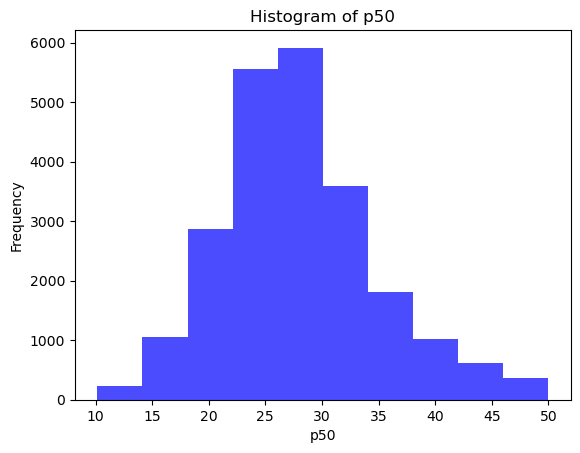

In [67]:
# Assuming your DataFrame is called "your_data" and has a column "p50"
plt.hist(df['p50'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of p50')
plt.xlabel('p50')
plt.ylabel('Frequency')
plt.show()

### Exlusion groups based on non physiologically values

In [31]:
# for p50 

# Numbers in the range (<10,>50) are not physiologically possible 
# Primary outcome so all values should be whithin the range 

sample_df_new = df[(df['p50'] > 10) & (df['p50'] < 50)]

In [32]:
column_names_final = sample_df_new.columns.tolist()

print("Column names:", column_names_final)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'hospitalid', 'teachingstatus', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_value', 'in_hospital_mortality', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'vitals_heart_rate', 'vitals_resp_rate', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet', 'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total', 'hfp_albumin', 'sofa_past_overall_24hr', 'teachingstatus_encoded', 'source_db_mimic_iii', 'source_db_mimic_iv', 'region_Northeast', 'region_South', 'region_West', 'race_ethnicity_Asian', 'race_ethnicity_Black', 'race

In [34]:
## for ph 

# Assuming your DataFrame is called "your_data" and has a column "ph"
sample_df_new['pH'] = sample_df_new[sample_df_new['pH'] <= 7.81]['pH']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_9593/3667339608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['pH'] = sample_df_new[sample_df_new['pH'] <= 7.81]['pH']


In [35]:
## for cbc_hemoglobin
sample_df_new['cbc_hemoglobin'] = sample_df_new[sample_df_new['cbc_hemoglobin'] <= 20]['cbc_hemoglobin']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_9593/365939063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['cbc_hemoglobin'] = sample_df_new[sample_df_new['cbc_hemoglobin'] <= 20]['cbc_hemoglobin']


In [36]:
## BMI_admission
sample_df_new['BMI_admission'] = sample_df_new[sample_df_new['BMI_admission'] <= 100]['BMI_admission']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_9593/2112235615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['BMI_admission'] = sample_df_new[sample_df_new['BMI_admission'] <= 100]['BMI_admission']


In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean') 

# Fit the imputer to your dataset and transform all missing values
df_imputed = pd.DataFrame(imputer.fit_transform(sample_df_new), columns=data_clean.columns)

# Now df_imputed contains your original dataset with all missing values imputed using the mean

In [38]:
df = df_imputed

### Profile Report

In [39]:
import pandas as pd
import pandas_profiling  # Import the pandas_profiling library
from pandas_profiling import ProfileReport

# sample_df = df_cleaned_fromMissing.sample(frac=0.1)  # Use 50% of the data for profiling

# Generate a profile report for the DataFrame
# profile = pandas_profiling.ProfileReport(sample_df, pool_size=4) 
profile = pandas_profiling.ProfileReport(sample_df)

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_9593/1642860752.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling  # Import the pandas_profiling library


NameError: name 'sample_df' is not defined

N.B: Very computationally heavy. Thus we are: 
* Only using a percentage of the data for profiling
* Parallel Processing: If your system supports it, you can enable parallel processing using the pool_size parameter. This can help distribute computations across multiple CPU cores.
* Turn Off Specific Analyses: The pandas_profiling.ProfileReport() function has several parameters that allow you to customize the analyses performed. For example, you can turn off correlation computations or histogram calculations if they are not essential for your analysis.




### Removing outliers

- **Reason to Remove Outliers: Impact on Clustering:** Outliers can significantly affect the results of clustering algorithms like k-means. Clusters might be pulled or stretched due to the presence of outliers, leading to suboptimal results.
- **Reason to Keep Outliers: Algorithm Robustness:** Some clustering algorithms, like hierarchical clustering or DBSCAN, are more robust to the presence of outliers. They might naturally form separate clusters or noise groups.

### Dimentionality reduction
Performing dimensionality reduction before clustering might not be the best approach, as our primary goal is  to understand the characteristics and differences among clusters based on certain features (like gender),

### Normasation and Standarization: 
If needed, normalize or standardize your data to ensure that features with different scales don't disproportionately influence the clustering process.

In [ ]:
# # IF NORMALISATION IS NEEDED  
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Select columns to standardize
# # columns_to_standardize = ['valence', 'speechiness', 'loudness', 'liveness' , 'instrumentalness', 'energy', 'duration_ms', 'danceability', 'acousticness', 'popularity', 'instance_id']

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the selected columns
# scaler.fit(df_imputed)

# # Transform the selected columns
# df_imputed = scaler.transform(df_imputed)

# Clustering

## Choosing the Number of Clusters (K)

- The choice of K (number of clusters) is crucial. There are several methods to help you determine an optimal K, such as the elbow method, silhouette score, or gap statistic. These methods can help you decide on an appropriate number of clusters based on your data.
    
Working with unsupervised clustering to get the clusters from the data

## K means 

### Elbow Method

The elbow method is a heuristic technique used to determine the optimal number of clusters in a clustering algorithm, such as k-means. It is called the "elbow method" because when the number of clusters increases, the reduction in within-cluster sum of squares (inertia) tends to form an "elbow" shape on a plot. The point where the reduction starts to slow down represents a reasonable estimate of the optimal number of clusters.

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# List to store the within-cluster sum of squares (inertia) for different k values
inertia_values = []

# Range of k values to test
k_range = range(1, 11)

# Calculate inertia for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_imputed)
    inertia_values.append(kmeans.inertia_)


/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

We plot the elbow curve to visualize the inertia values for different k values. The "elbow" point in the plot represents a point of diminishing returns, indicating the optimal number of clusters.

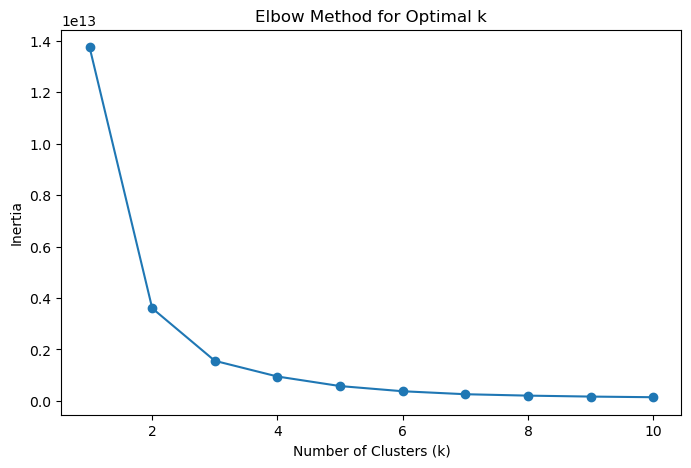

In [41]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In your plotted graph, look for the point where the inertia starts decreasing more slowly after an initial steep drop. This point is usually considered the "elbow" and represents a good choice for the number of clusters.

Keep in mind that sometimes the elbow might not be very clear, especially in complex datasets. In such cases, you might need to make a subjective decision based on the trade-off between simplicity (fewer clusters) and capturing meaningful structure in your data (more clusters).

Once you've identified the point, the corresponding value of 'k' is a reasonable choice for the number of clusters in your KMeans clustering analysis.

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


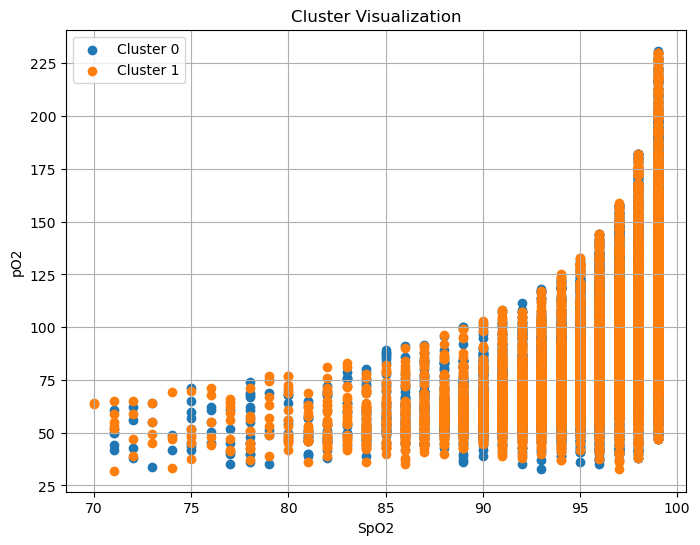

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you've already determined that 2 is the optimal number of clusters
num_clusters = 2

# Create a KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_imputed)  # Fit the model

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the clusters and data points
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for cluster_id in range(num_clusters):
    plt.scatter(
        df_imputed['SpO2'][cluster_labels == cluster_id],  # Replace with your desired feature 1 column
        df_imputed['pO2'][cluster_labels == cluster_id],  # Replace with your desired feature 2 column
        label=f'Cluster {cluster_id}'
    )

plt.xlabel('SpO2')  # Replace with your desired x-axis label
plt.ylabel('pO2')  # Replace with your desired y-axis label
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()


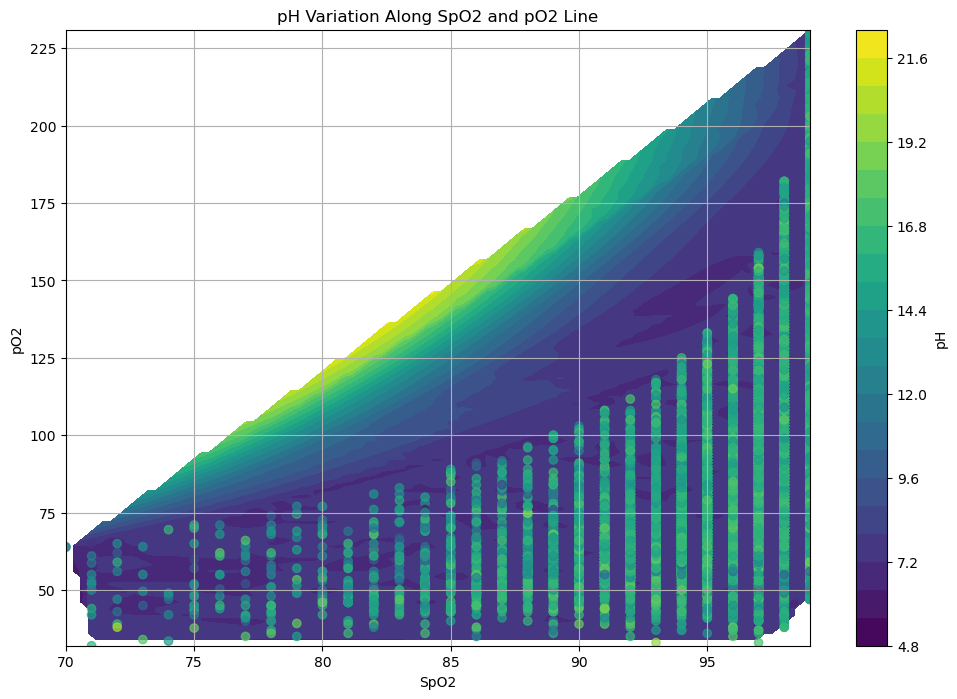

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a grid of points along the line formed by 'SpO2' and 'pO2'
num_points = 100
min_SpO2 = df_imputed['SpO2'].min()
max_SpO2 = df_imputed['SpO2'].max()
min_pO2 = df_imputed['pO2'].min()
max_pO2 = df_imputed['pO2'].max()

grid_SpO2, grid_pO2 = np.meshgrid(
    np.linspace(min_SpO2, max_SpO2, num_points),
    np.linspace(min_pO2, max_pO2, num_points)
)

# Interpolate 'pH' values for the grid points
grid_pH = griddata(
    (df_imputed['SpO2'], df_imputed['pO2']),
    df_imputed['pH'],
    (grid_SpO2, grid_pO2),
    method='cubic'
)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the interpolated pH values as a contour plot
contour = plt.contourf(grid_SpO2, grid_pO2, grid_pH, levels=20, cmap='viridis')
plt.colorbar(contour, label='pH')

# Scatter plot of the actual data points
plt.scatter(df_imputed['SpO2'], df_imputed['pO2'], c=df_imputed['pH'], cmap='viridis', alpha=0.7)

plt.xlabel('SpO2')
plt.ylabel('pO2')
plt.title('pH Variation Along SpO2 and pO2 Line')

plt.grid(True)
plt.show()


In [71]:
import seaborn as sns

# Replace 'variable' with the actual column name of the variable
variable_data = df_imputed['pH']

mean_value = variable_data.mean()
median_value = variable_data.median()

print(mean_value)
print(median_value)

7.357906186238333
7.37


### K means in 2D

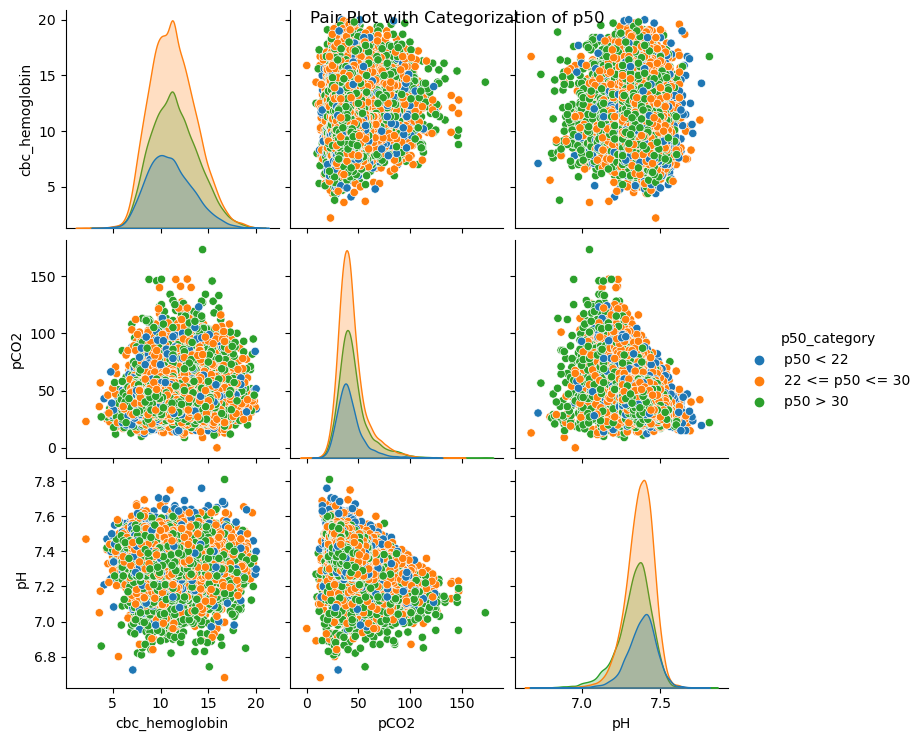

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Categorize p50 values based on defined bins
df_imputed['p50_category'] = pd.cut(df_imputed['p50'], bins=p50_bins, labels=p50_labels)

# Select relevant features for visualization
relevant_features = ['cbc_hemoglobin', 'pCO2', 'pH', 'p50_category']

# Prepare data using relevant features
data_for_plot = df_imputed[relevant_features]

# Create pair plot with color-coded categories
sns.pairplot(data_for_plot, hue='p50_category', diag_kind='kde')
plt.suptitle('Pair Plot with Categorization of p50')
plt.show()


### K means in 3D

In [43]:
# Get values in the 'p50' column for the range '22 <= p50 <= 30'
p50_range_values = df_imputed[(df_imputed['p50'] >= 22) & (df_imputed['p50'] <= 30)]['p50']

if not p50_range_values.empty:
    print("Values in the '22 <= p50 <= 30' range:")
    print(p50_range_values)
else:
    print("There are no values in the '22 <= p50 <= 30' range.")


Values in the '22 <= p50 <= 30' range:
2        27.041090
4        26.234485
6        27.575510
7        24.594829
8        26.755061
           ...    
23021    27.054312
23024    28.878259
23033    22.187561
23034    26.234485
23035    23.778308
Name: p50, Length: 11444, dtype: float64


### Relating to Regions 

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

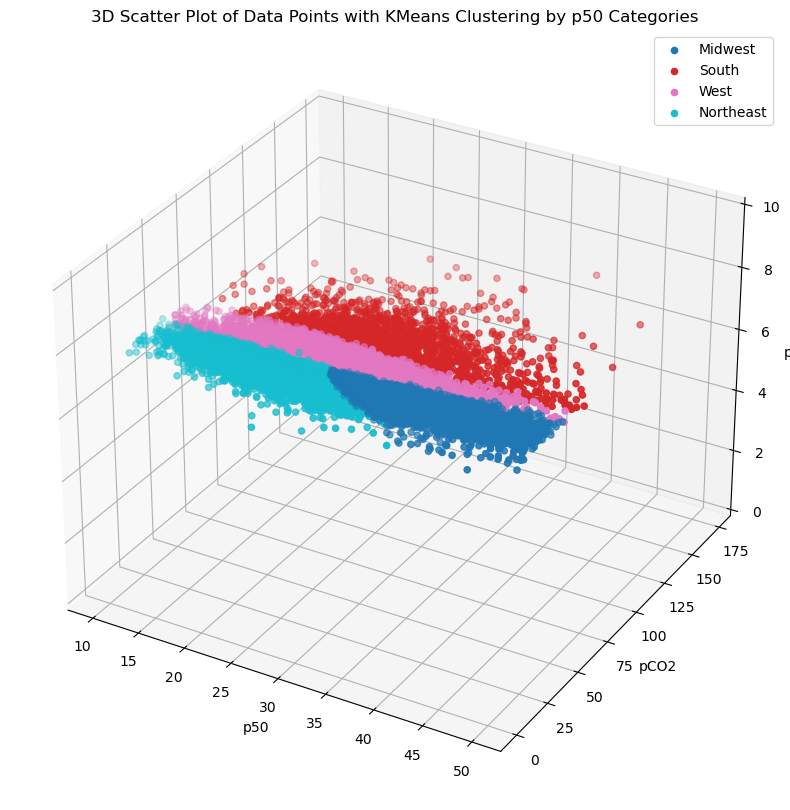

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['Midwest', 'South', 'West', 'Northeast']


# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

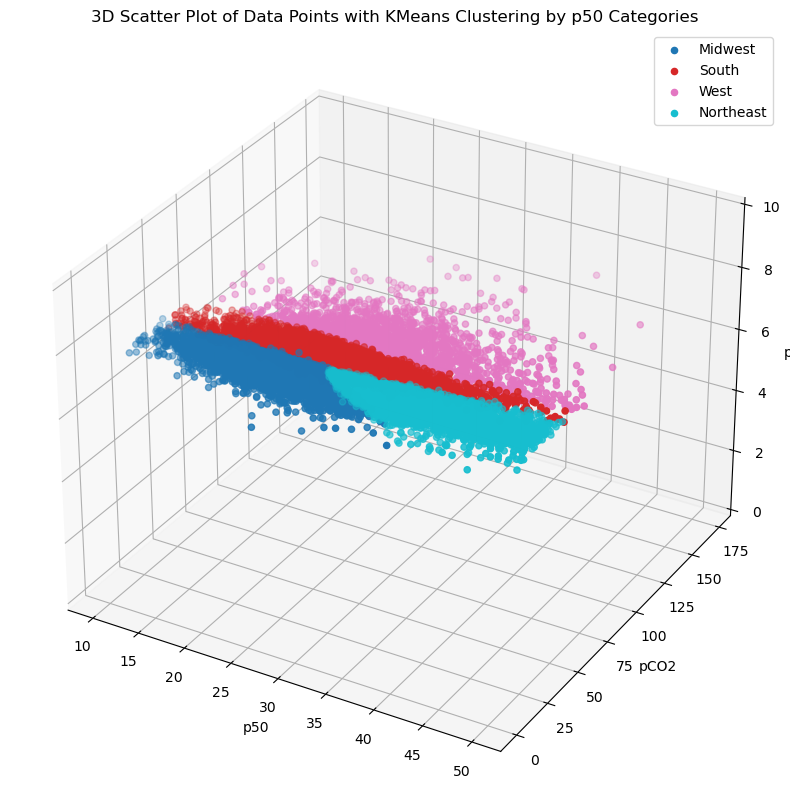

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['Midwest', 'South', 'West', 'Northeast']

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']
# relevant_features = ['SpO2', 'pO2', 'pH']


# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()

### Relating to ranges of p50 

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

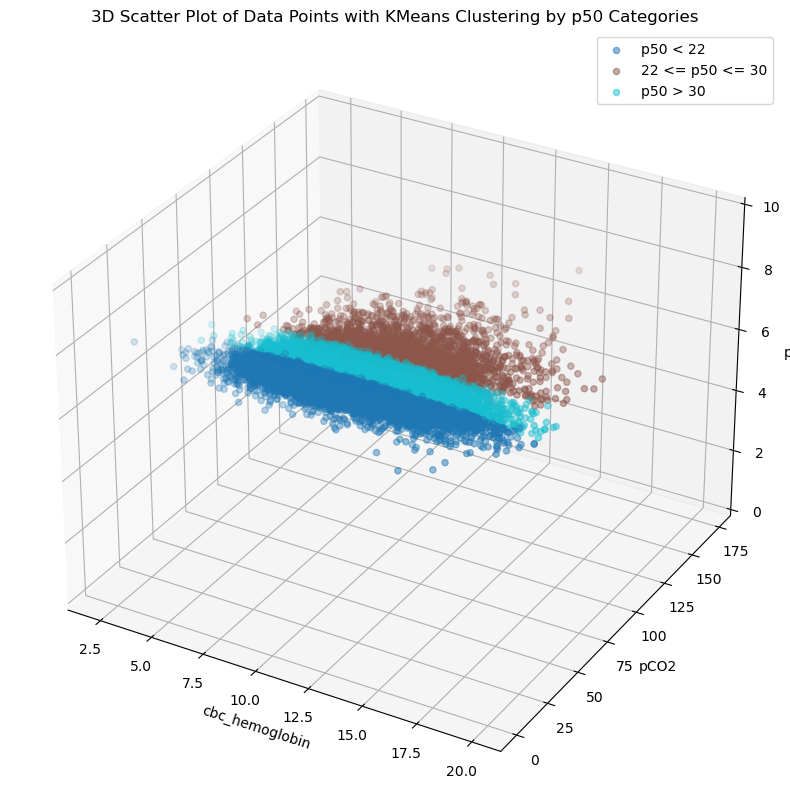

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# categorise p50 -> <22 , 22-30, 30> 
# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Select relevant features for visualization
# relevant_features = ['SpO2', 'pO2', 'pH']
# p50 -> dependent variable 
# cbc_hemoglobin, pH -> independent
relevant_features = ['cbc_hemoglobin', 'pCO2', 'pH']

# Prepare data using regions and relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(p50_labels))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to regions with transparency (alpha value)
color_map = plt.cm.get_cmap('tab10', len(p50_labels))

# Plot the data points with color coding based on regions and transparency
for i, p50_category in enumerate(p50_labels):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i, alpha=0.5), label=p50_category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
# ax.set_xlim(0, 100)  # Adjust the limits as needed
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

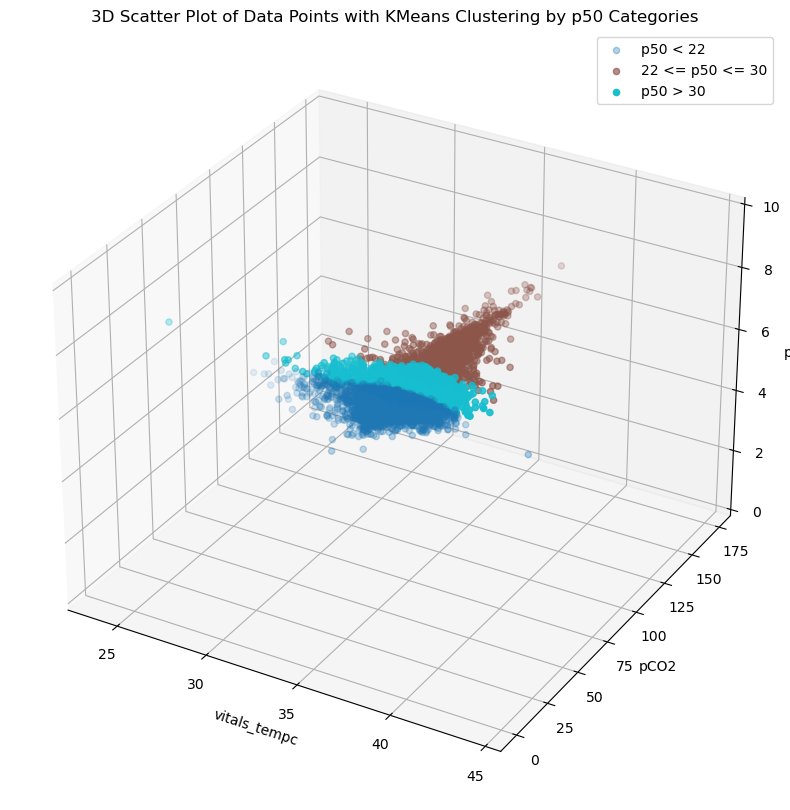

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# categorise p50 -> <22 , 22-30, 30> 
# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Select relevant features for visualization
relevant_features = ['vitals_tempc', 'pCO2', 'pH']

# Prepare data using regions and relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(p50_labels))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to regions with varying transparency (alpha values)
color_map = plt.cm.get_cmap('tab10', len(p50_labels))

# Vary transparency based on the index
for i, p50_category in enumerate(p50_labels):
    indices = np.where(cluster_labels == i)[0]
    alpha_value = (i + 1) / len(p50_labels)  # Vary transparency based on index
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i, alpha=alpha_value), label=p50_category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
# ax.set_xlim(0, 100)  # Adjust the limits as needed
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


### Relating to Race

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

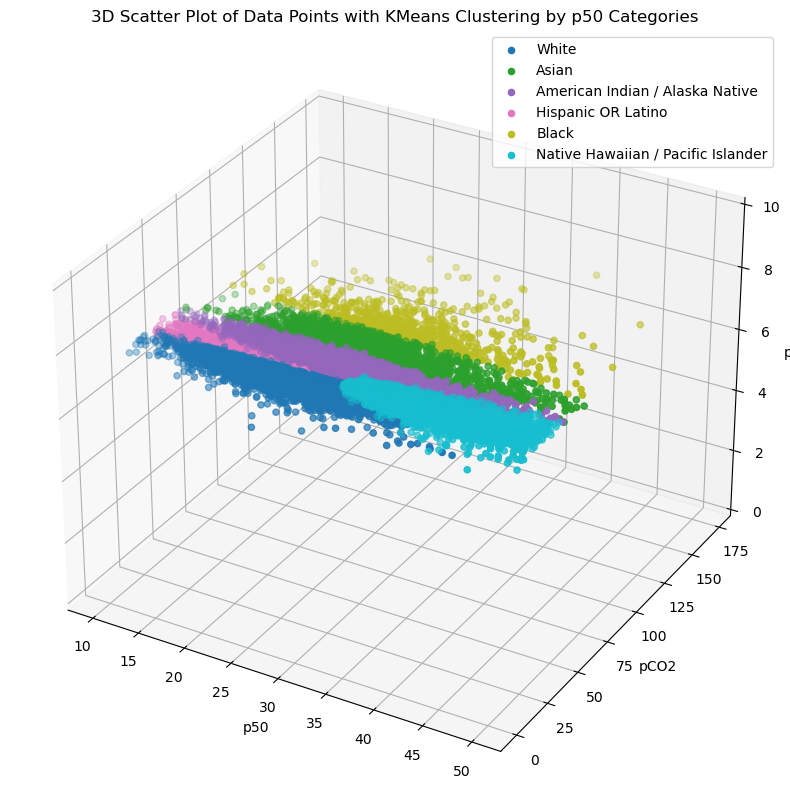

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['White', 'Asian', 'American Indian / Alaska Native', 'Hispanic OR Latino', 'Black', 'Native Hawaiian / Pacific Islander']

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


### Relating to Sex 

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


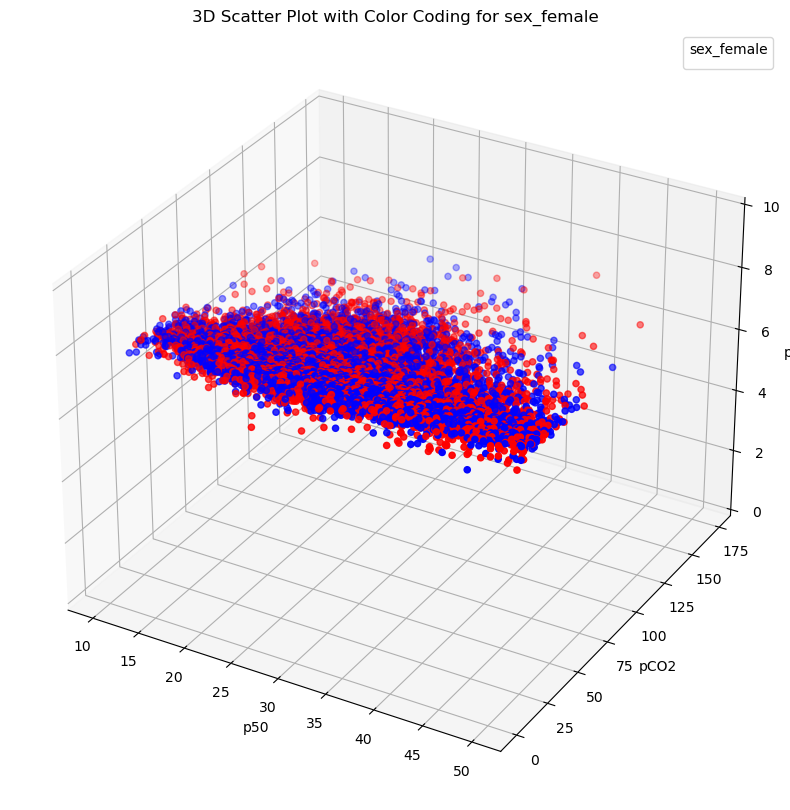

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on 'sex_female' column
colors = np.where(df_imputed['sex_female'] == 1, 'r', 'b')  # Red for female, blue for not female

# Plot the data points with color coding based on 'sex_female' column
scatter = ax.scatter(X[relevant_features[0]], X[relevant_features[1]], X[relevant_features[2]], c=colors)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot with Color Coding for sex_female')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend(*scatter.legend_elements(), title='sex_female')

# Show the plot
plt.show()


## DBSCAN
We can perform clustering, including DBSCAN, without converting categorical variables into numerical ones. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can work directly with categorical variables without requiring explicit numerical encoding.
Background: DBSCAN operates by defining clusters as dense regions of data points separated by areas of lower density. This makes it suitable for discovering clusters of arbitrary shapes and handling noise.




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

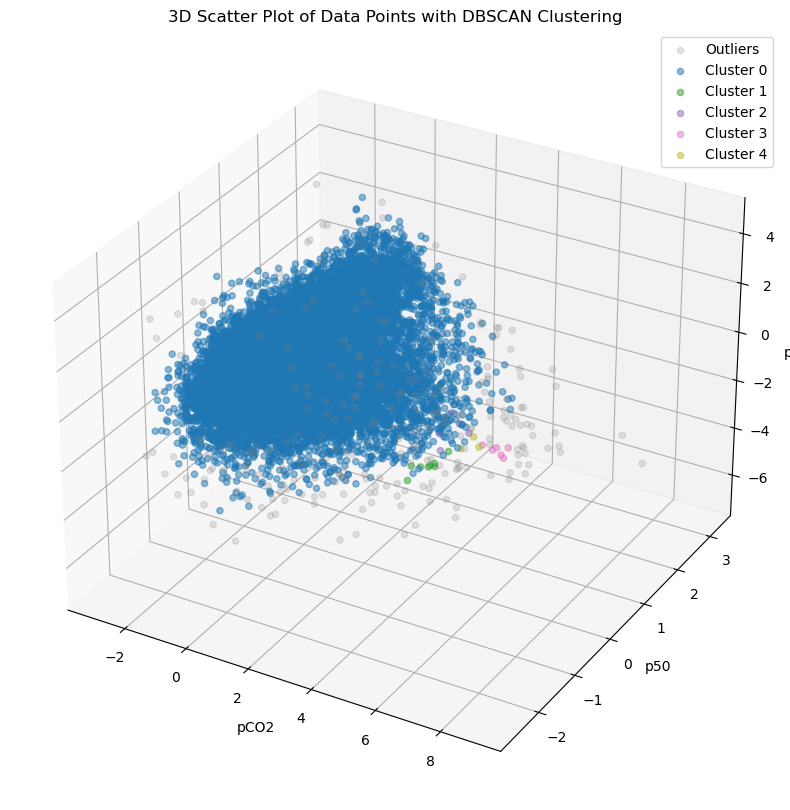

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select relevant features for visualization
relevant_features = ['pCO2', 'p50', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Scale the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color coding based on clusters
unique_labels = np.unique(cluster_labels)
color_map = plt.cm.get_cmap('tab20', len(unique_labels))

for label in unique_labels:
    if label == -1:  # Outliers
        indices = np.where(cluster_labels == label)[0]
        ax.scatter(X_scaled[indices, 0], X_scaled[indices, 1], X_scaled[indices, 2], c='gray', label='Outliers', alpha=0.2)
    else:
        indices = np.where(cluster_labels == label)[0]
        ax.scatter(X_scaled[indices, 0], X_scaled[indices, 1], X_scaled[indices, 2], c=color_map(label), label=f'Cluster {label}', alpha=0.5)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with DBSCAN Clustering')

# Add legend
ax.legend()

# Show the plot
plt.show()


## tSNE

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate 2D embedding using t-SNE with perplexity=20
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
embedding = tsne.fit_transform(df_imputed)

# Determine optimal  number of clusters using Silhouette method
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding)
    sil_score = silhouette_score(embedding, cluster_labels)
    sil_scores.append(sil_score)

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

In [53]:
from sklearn.cluster import DBSCAN
import numpy as np

optimal_k = np.argmax(sil_scores) + 2

print('Optimal number of clusters:', optimal_k)

Optimal number of clusters: 3


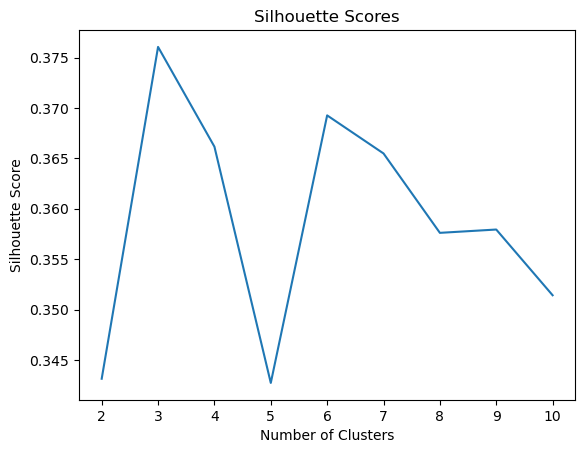

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


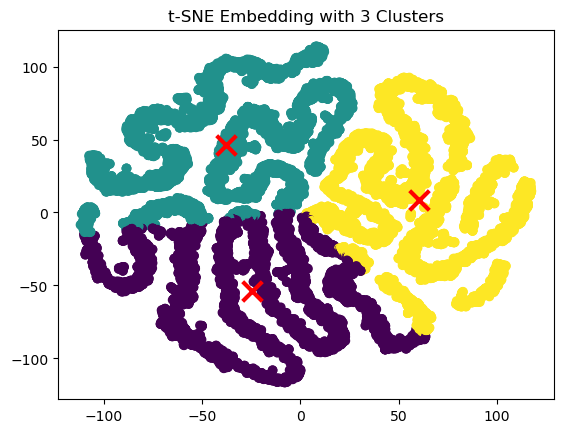

Total sum of distance of all points to their respective cluster centers: 1023702.7579967207


In [54]:
# Plot Silhouette scores
plt.plot(range(2,11), sil_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Generate plot with each wine represented as a dot in a 2D space in the color of its cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)
cluster_centers = kmeans.cluster_centers_

plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('t-SNE Embedding with {} Clusters'.format(optimal_k))
plt.show()

# Compute sum of distances of all points to their respective cluster centers
distances = cdist(embedding, cluster_centers, 'euclidean')
min_distances = np.min(distances, axis=1)
sum_distances = np.sum(min_distances)

print('Total sum of distance of all points to their respective cluster centers:', sum_distances)